# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Mini Project: Credit Card Default Risk Analysis

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in finacial sector
* use a real world dataset.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Dataset Description

The dataset chosen for this mini project is [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) with 30000 instances each having 25 attributes.



In [1]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
#from pandas_profiling import ProfileReport
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import os

**Exercise 1**: Load the data show the top few rows of the dataframe.  (***1 point***)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [104]:
# YOUR CODE HERE
df = pd.read_excel('default of credit card clients.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [101]:
df['X2'] = pd.Categorical(df['X2'].map({1: 'Male', 2: 'Female'}))

# Convert Education (X3)
education_mapping = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}
df['X3'] = pd.Categorical(df['X3'].map(education_mapping))

# Convert Marital Status (X4)
marital_mapping = {1: 'Married', 2: 'Single', 3: 'Others'}
df['X4'] = pd.Categorical(df['X4'].map(marital_mapping))

# Convert Repayment Status (X6 - X11)
repayment_mapping = {
    -2: 'No Consumption',
    -1: 'Pay Duly',
    1: 'Payment Delay for One Month',
    2: 'Payment Delay for Two Months',
    3: 'Payment Delay for Three Months',
    4: 'Payment Delay for Four Months',
    5: 'Payment Delay for Five Months',
    6: 'Payment Delay for Six Months',
    7: 'Payment Delay for Seven Months',
    8: 'Payment Delay for Eight Months',
    9: 'Payment Delay for Nine Months and Above'
}

repayment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in repayment_columns:
    df[col] = pd.Categorical(df[col].map(repayment_mapping))

# Verify changes
print(df.dtypes)

KeyError: 'PAY_0'

In [105]:
data = df.drop(labels=0, axis=0)
data.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Exercise 2**: Perform the following

- Exploratory Data Analysis (***2 points***)
- Preprocessing (***2 points***)

## Exploratory data analysis

there are total 23 explanatory variables and one response variable. Some variable need to be converted to categories. such as.

* __Gender(X2)__
1 = Male, 2 = Female

* __EDUCATION(X3)__
1 = graduate school; 2 = university; 3 = high school; 4 = others
* __Marital status(X4)__
1 = married; 2 = single; 3 = others
* __Repayment status(X6-X11)__
   -2= no consumption, -1= pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ...,8 = payment delay for eight months,9 = payment delay for nine months and above

   these variables should be converted to categorical variable


In [106]:

gender_mapping = {1:'Male',2: 'Female'}
data['X2'] = data['X2'].map(gender_mapping).astype('category')
eduction_mapping = {1: 'graduate school', 2: 'university', 3: 'high school',4: 'others'}
marital_mapping = {1: 'Married', 2: 'Single', 3: 'Others'}
data['X4'] = data['X4'].map(marital_mapping).astype('category')
data['X3'] = data['X3'].map(eduction_mapping).astype('category')
repayment_mapping = {-2: 'No Consumption', -1: 'Pay Duly', 1: '1 Month Delay', 2: '2 Months Delay',
                     3: '3 Months Delay', 4: '4 Months Delay', 5: '5 Months Delay',
                     6: '6 Months Delay', 7: '7 Months Delay', 8: '8 Months Delay',
                     9: '9+ Months Delay'}

# Apply mapping to each repayment status column (X6 to X11)
for i in range(6, 12):
    data[f'X{i}'] = data[f'X{i}'].map(repayment_mapping).astype('category')
print(data.head())

  Unnamed: 0      X1      X2          X3       X4  X5              X6  \
1          1   20000  Female  university  Married  24  2 Months Delay   
2          2  120000  Female  university   Single  26        Pay Duly   
3          3   90000  Female  university   Single  34             NaN   
4          4   50000  Female  university  Married  37             NaN   
5          5   50000    Male  university  Married  57        Pay Duly   

               X7        X8        X9  ...    X15    X16    X17   X18    X19  \
1  2 Months Delay  Pay Duly  Pay Duly  ...      0      0      0     0    689   
2  2 Months Delay       NaN       NaN  ...   3272   3455   3261     0   1000   
3             NaN       NaN       NaN  ...  14331  14948  15549  1518   1500   
4             NaN       NaN       NaN  ...  28314  28959  29547  2000   2019   
5             NaN  Pay Duly       NaN  ...  20940  19146  19131  2000  36681   

     X20   X21   X22   X23  Y  
1      0     0     0     0  1  
2   1000  1000  

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
repayment_columns = ['X6','X7','X8','X9','X10','X11']
categorical_cols = ['X2', 'X3', 'X4'] + repayment_columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Create a pipeline that first transforms the data then fits the model
pipeline_logistic = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression())])

pipeline_perceptron = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', Perceptron())])
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC())])
X = data.drop(columns=['Y'])  # Assuming Y is the response variable
y = data['Y']
y_categorical = (y > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.25, random_state=42)
pipeline_logistic.fit(X_train, y_train)
y_pred_logistic = pipeline_logistic.predict(X_test)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
pipeline_perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred_perceptron = pipeline_perceptron.predict(X_test)

# Evaluate the model's performance
print("Perceptron Model Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_perceptron))
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))
pipeline_svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = pipeline_svm.predict(X_test)

# Evaluate the model's performance
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Logistic Regression Model Accuracy: 0.8205333333333333
Confusion Matrix:
 [[5592  281]
 [1065  562]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500

Perceptron Model Accuracy: 0.7805333333333333
Confusion Matrix:
 [[5399  474]
 [1172  455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      5873
           1       0.49      0.28      0.36      1627

    accuracy                           0.78      7500
   macro avg       0.66      0.60      0.61      7500
weighted avg       0.75      0.78      0.76      7500

SVM Model Accuracy: 0.8210666666666666
SVM Matrix:
 [[5591  282]
 [1060  567]]
Classification Report:
   

In [45]:
# df.drop('0',axis=1,inplace=True)
# df.head

### Statistics
The detail statistics of the dataset

In [46]:
print("STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

STATISTICS OF NUMERIC COLUMNS

            count unique         top   freq
Unnamed: 0  30000  30000           1      1
X1          30000     81       50000   3365
X2          30000      2      Female  18112
X3          29655      4  university  14030
X4          29946      3      Single  15964
X5          30000     56          29   1605
X6          15263     10    Pay Duly   5686
X7          14270     10    Pay Duly   6050
X8          14236     10    Pay Duly   5938
X9          13545     10    Pay Duly   5687
X10         13053      9    Pay Duly   5539
X11         13714      9    Pay Duly   5740
X12         30000  22723           0   2008
X13         30000  22346           0   2506
X14         30000  22026           0   2870
X15         30000  21548           0   3195
X16         30000  21010           0   3506
X17         30000  20604           0   4020
X18         30000   7943           0   5249
X19         30000   7899           0   5396
X20         30000   7518           0   5968
X

In [49]:
data.X2.value_counts() # male, female counts

,count
X2,
Female,18112
Male,11888


In [50]:
data.X3.value_counts() #Education categories

,count
X3,
university,14030
graduate school,10585
high school,4917
others,123


In [51]:
data.X4.value_counts() # Marriage catagories

,count
X4,
Single,15964
Married,13659
Others,323


In [52]:
data.X6.describe()

,X6
count,15263
unique,10
top,Pay Duly
freq,5686


# Visualization

<Figure size 2000x600 with 0 Axes>

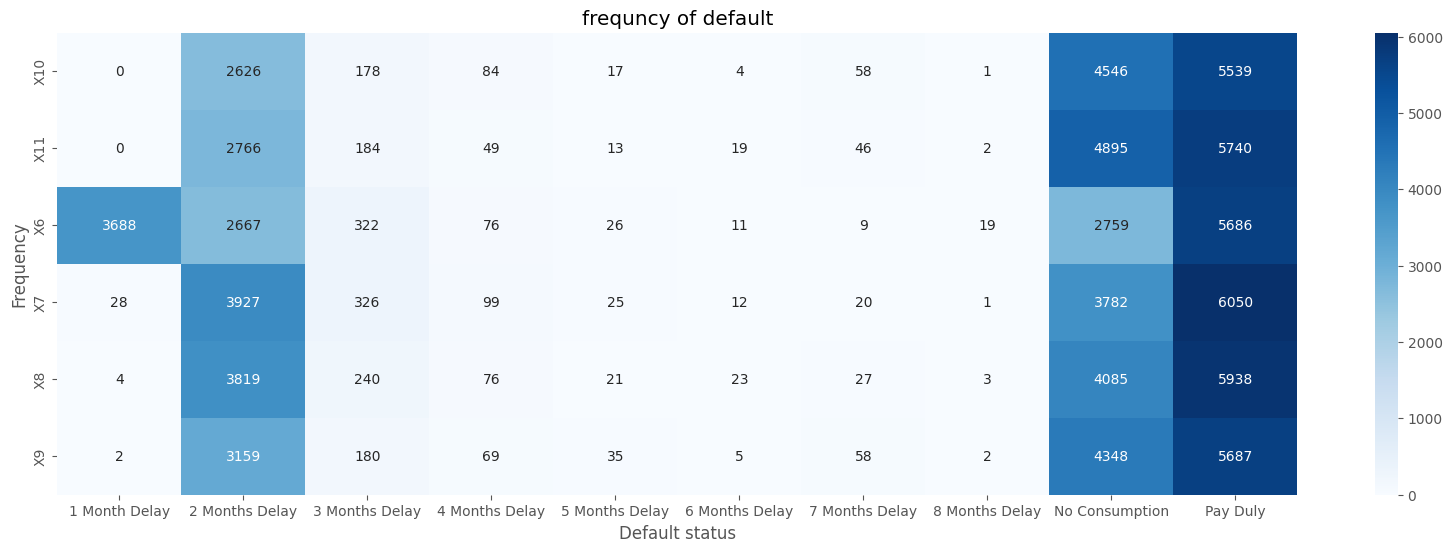

In [53]:
from IPython.core.pylabtools import figsize
# plot the frequency of defaults
plt.figure(figsize=(20,6))
repayment_columns = ['X6', 'X7', 'X8', 'X9', 'X10','X11']
df_melted = pd.melt(data, value_vars=repayment_columns, var_name='Repayment Month', value_name='Repayment Status')
data.columns
repayment_crosstab = pd.crosstab(df_melted['Repayment Month'], df_melted['Repayment Status'])
plt.figure(figsize=(20, 6))
sns.heatmap(repayment_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('frequncy of default')
plt.xlabel('Default status')
plt.ylabel('Frequency')
plt.show()

<ipython-input-54-a0296112762e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


TypeError: 'value' must be an instance of str or bytes, not a int

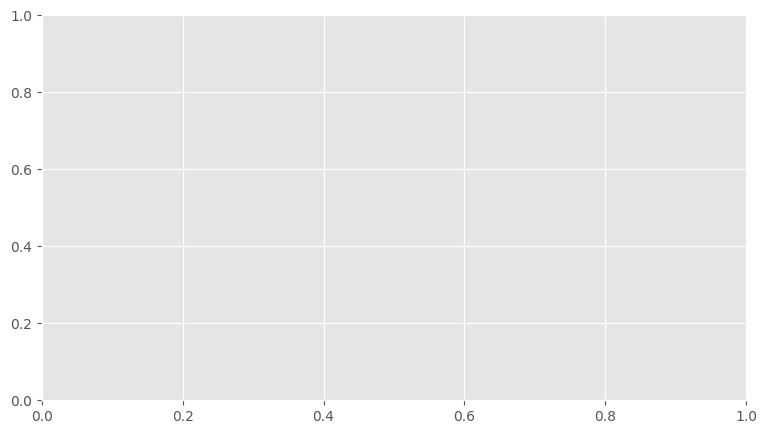

In [54]:
# Plot distribution of age and limit balance
plt.subplots(figsize=(20,5))
plt.subplot(121)
plt.hexbin(data['X1'], df['X5'], gridsize=30, cmap='Blues', mincnt=1)
plt.title('Scatter Plot of Age vs. Limit Balance')
plt.xlabel('Age')
plt.ylabel('Limit Balance')

plt.show()

# plt.subplot(122)
# # YOUR CODE HERE

# plt.show()

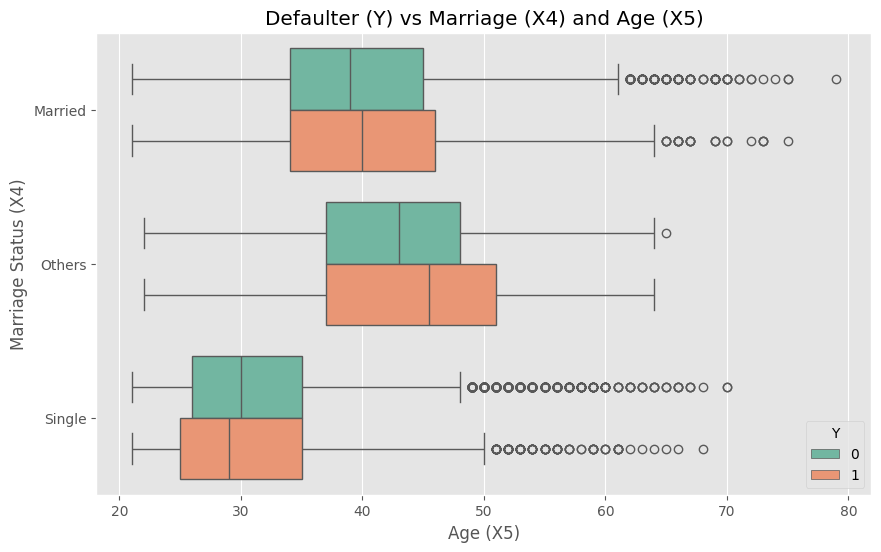

In [55]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library
plt.figure(figsize=(10, 6))
sns.boxplot(x='X5', y='X4', hue='Y', data=data, palette='Set2')
# Add title and labels
plt.title('Defaulter (Y) vs Marriage (X4) and Age (X5)')
plt.xlabel('Age (X5)')
plt.ylabel('Marriage Status (X4)')

# Show the plot
plt.show()

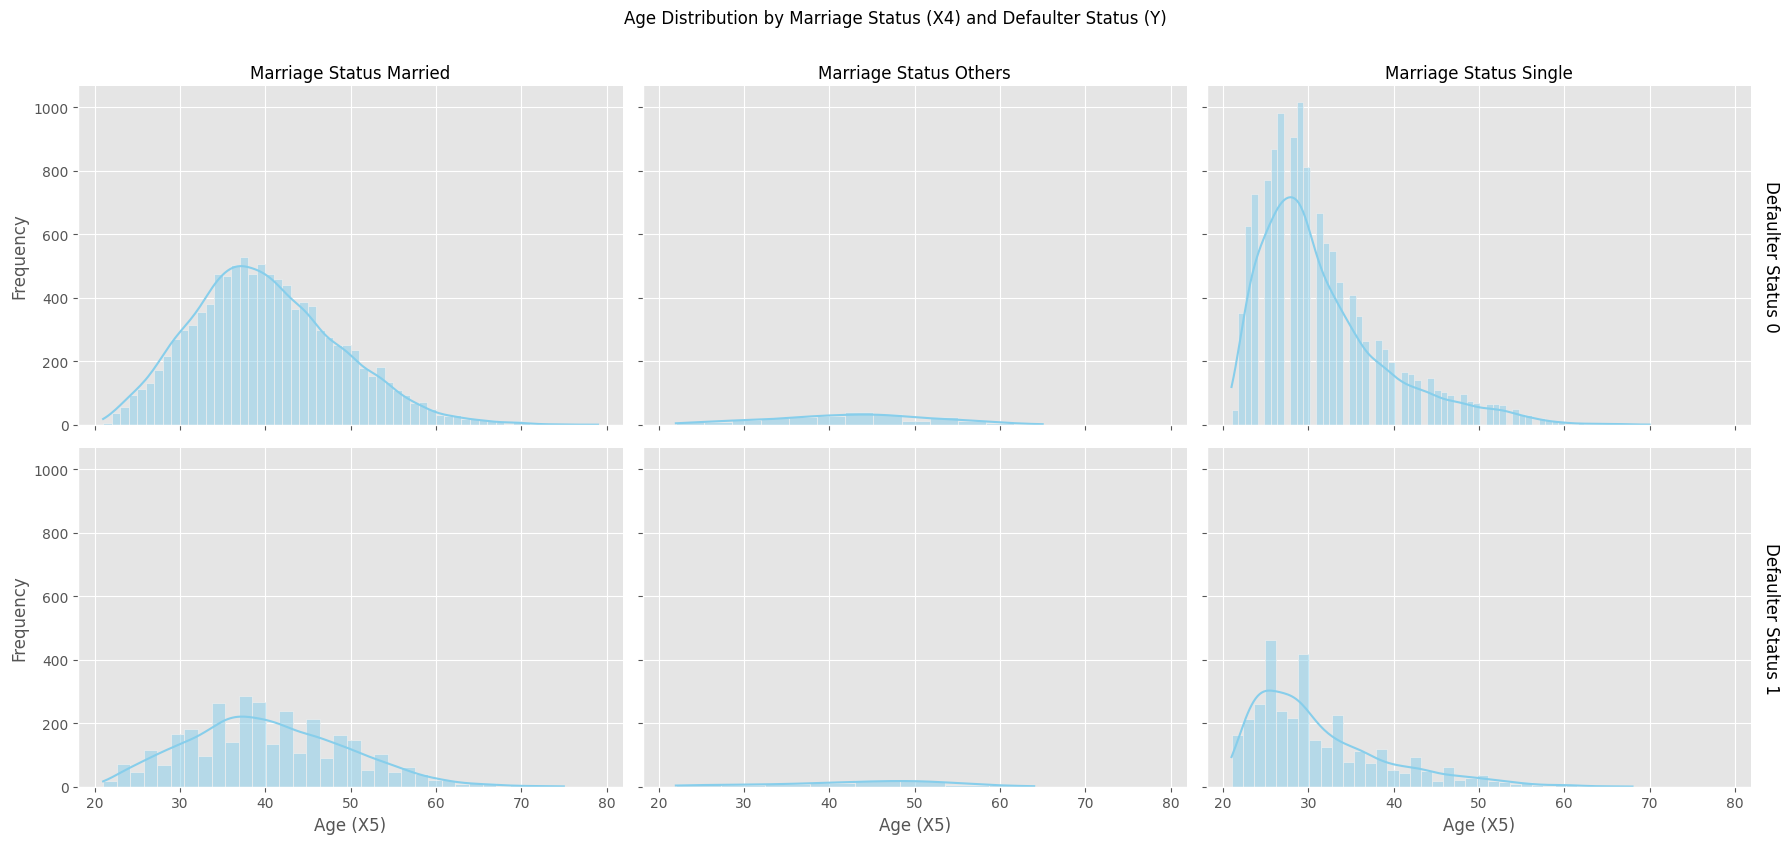

In [56]:
g = sns.FacetGrid(data, col="X4", row="Y", margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, "X5", kde=True, color="skyblue")

g.set_axis_labels("Age (X5)", "Frequency")
g.set_titles(col_template="Marriage Status {col_name}", row_template="Defaulter Status {row_name}")
plt.suptitle('Age Distribution by Marriage Status (X4) and Defaulter Status (Y)', y=1.05)

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

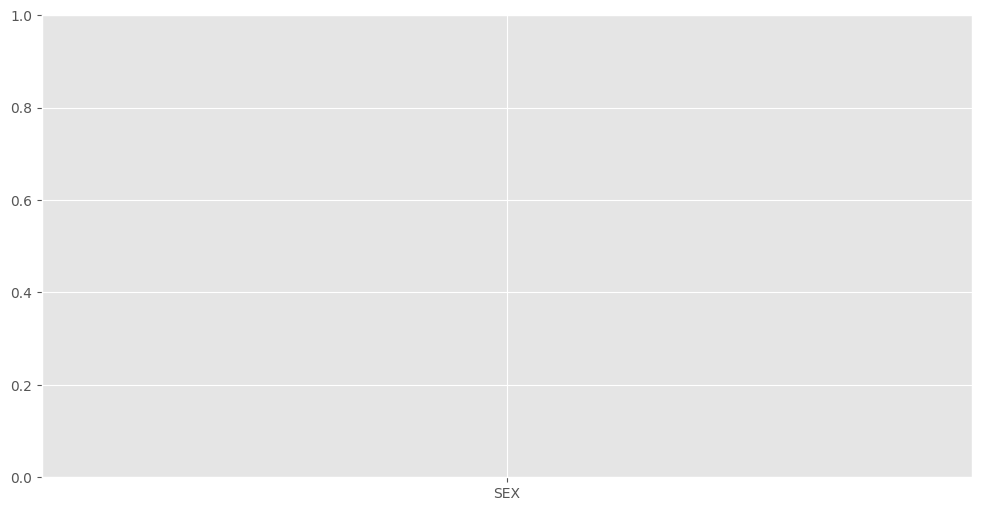

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='X2', y='X5', hue='Y', data=df, palette='Set2')

# Add title and labels
plt.title('Box Plot of Age (X5) by Sex (X2) and Defaulter Status (Y)')
plt.xlabel('Sex (X2)')
plt.ylabel('Age (X5)')

plt.show()

# Preprocessing

In [34]:
print({'X3': 'EDU'}.items())

dict_items([('X3', 'EDU')])


In [92]:
# # write a function for onehot_encode
# def onehot_encode(df, column_dict):
#     print(df.dtypes)
#     # df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.copy()
#     for column, values in column_dict.items():
#         for value in values:
#             print(value)
#             # Create new column for each value to be one-hot encoded
#             print(df[column] == value)
#             df[f'{column}_{value}'] = (df[column] == value).astype(int)
#     return df

def onehot_encode(df, column_dict):
    df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    print("Initial Data Types:\n", df.dtypes)  # Print initial data types for debugging

    for column, values in column_dict.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' does not exist in DataFrame.")
            continue

        # Ensure that we only process non-null values
        for value in values:
            print(f"Processing value: {value} for column: {column}")
            # Create new column for each value to be one-hot encoded
            df[f'{column}_{value}'] = (df[column] == value).astype(int)

    # Drop the original column if desired
    df = df.drop(columns=column_dict.keys(), errors='ignore')  # Drop original columns if needed
    return df

In [90]:
def preprocess_inputs(df):
    df = df.copy()



    df = onehot_encode(
        df,
        {
            'X2': ["Female","Male"],
            'X3': ["graduate school", "university", "high school", "others"],
            'X4': ["single", "married", "divorced"],
            'X6': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay'],
            'X7': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay'],
            'X8': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay'],
            'X9': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay'],
            'X10': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay'],
            'X11': ['No Consumption','Pay Duly','1 Month Delay','2 Months Delay',
                     '3 Months Delay', '4 Months Delay', '5 Months Delay',
                     '6 Months Delay','7 Months Delay', '8 Months Delay',
                     '9+ Months Delay']
        }
    )

    # Split df into X and y
    y = df['Y'].copy()
    X = df.drop('Y', axis=1).copy()

    # Scale X with a standard scaler

    return X, y

In [93]:
X, y = preprocess_inputs(data)

Initial Data Types:
 Unnamed: 0      object
X1              object
X2            category
X3            category
X4            category
X5              object
X6            category
X7            category
X8            category
X9            category
X10           category
X11           category
X12             object
X13             object
X14             object
X15             object
X16             object
X17             object
X18             object
X19             object
X20             object
X21             object
X22             object
X23             object
Y               object
dtype: object
Processing value: Female for column: X2
Processing value: Male for column: X2
Processing value: graduate school for column: X3
Processing value: university for column: X3
Processing value: high school for column: X3
Processing value: others for column: X3
Processing value: single for column: X4
Processing value: married for column: X4
Processing value: divorced for column: X4
Processing 

In [94]:
X

,Unnamed: 0,X1,X5,X12,X13,X14,X15,X16,X17,X18,...,X11_Pay Duly,X11_1 Month Delay,X11_2 Months Delay,X11_3 Months Delay,X11_4 Months Delay,X11_5 Months Delay,X11_6 Months Delay,X11_7 Months Delay,X11_8 Months Delay,X11_9+ Months Delay
1,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,1,0,0,0,0,0,0,0
3,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,0,0,0,0,0,0,0,0
4,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,0,0,0,0,0,0,0,0
5,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,39,188948,192815,208365,88004,31237,15980,8500,...,0,0,0,0,0,0,0,0,0,0
29997,29997,150000,43,1683,1828,3502,8979,5190,0,1837,...,0,0,0,0,0,0,0,0,0,0
29998,29998,30000,37,3565,3356,2758,20878,20582,19357,0,...,0,0,0,0,0,0,0,0,0,0
29999,29999,80000,41,-1645,78379,76304,52774,11855,48944,85900,...,1,0,0,0,0,0,0,0,0,0


In [95]:
y

,Y
1,1
2,1
3,0
4,0
5,0
...,...
29996,0
29997,0
29998,1
29999,1


In [81]:
{column: len(X[column].unique()) for column in X.columns}

{'Unnamed: 0': 30000,
 'X1': 81,
 'X5': 56,
 'X12': 22723,
 'X13': 22346,
 'X14': 22026,
 'X15': 21548,
 'X16': 21010,
 'X17': 20604,
 'X18': 7943,
 'X19': 7899,
 'X20': 7518,
 'X21': 6937,
 'X22': 6897,
 'X23': 6939,
 'X2_Female': 2,
 'X2_Male': 2,
 'X3_graduate school': 2,
 'X3_university': 2,
 'X3_high school': 2,
 'X3_others': 2,
 'X4_single': 1,
 'X4_married': 1,
 'X4_divorced': 1,
 'X6_No Consumption': 2,
 'X6_Pay Duly': 2,
 'X6_1 Month Delay': 2,
 'X6_2 Months Delay': 2,
 'X6_3 Months Delay': 2,
 'X6_4 Months Delay': 2,
 'X6_5 Months Delay': 2,
 'X6_6 Months Delay': 2,
 'X6_7 Months Delay': 2,
 'X6_8 Months Delay': 2,
 'X6_9+ Months Delay': 1,
 'X7_No Consumption': 2,
 'X7_Pay Duly': 2,
 'X7_1 Month Delay': 2,
 'X7_2 Months Delay': 2,
 'X7_3 Months Delay': 2,
 'X7_4 Months Delay': 2,
 'X7_5 Months Delay': 2,
 'X7_6 Months Delay': 2,
 'X7_7 Months Delay': 2,
 'X7_8 Months Delay': 2,
 'X7_9+ Months Delay': 1,
 'X8_No Consumption': 2,
 'X8_Pay Duly': 2,
 'X8_1 Month Delay': 2,
 'X8

**Exercise 3** (3 Points)

Train the model using the 4 ML models:

- Logistic Regression
- Perceptron
- SVM

## Training

Application of machine learning models, such as

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.





### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

### Random Forests

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.

The difference between the Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [98]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)
# print(X_scaled)

[[ 0.16572997  1.16835512  0.05418666 ... -0.03782347 -0.00975947
   0.        ]
 [ 0.74985616  2.09001707 -0.59710771 ... -0.03782347 -0.00975947
   0.        ]
 [ 0.58639793 -0.06052747  0.92257914 ... -0.03782347 -0.00975947
   0.        ]
 ...
 [ 1.51073456 -0.90538425 -0.70565677 ... -0.03782347 -0.00975947
   0.        ]
 [ 0.08827805 -1.05899458 -1.57404925 ... -0.03782347 -0.00975947
   0.        ]
 [ 0.57853714  1.55238093  0.05418666 ... -0.03782347 -0.00975947
   0.        ]]


In [97]:
# YOUR CODE HERE
model = LogisticRegression()
# print(data['unknown'])
model.fit(X_scaled, y_train)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

**Exercise 4**

Evaluate the models and display the results ( 2 points)

### Model Evaluation

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score

In [ ]:
# YOUR CODE HERE
